In [ ]:
import nibabel as nib
import statistics as stats
import csv
import numpy as np
import nilearn.plotting


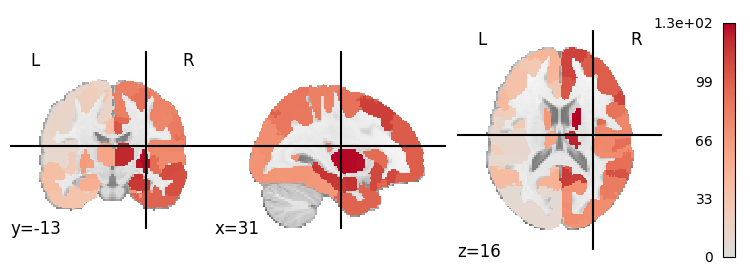

In [10]:
# Loads atlas
atlas_dir = '/fs03/kg98/gchan/Atlases/Tian/Schaefer_Tian/reordered/'
# Schaefer 100 and Tian 32 atlases
atlas_img = nib.load(atlas_dir + 'Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S2_MNI152NLin6Asym_1.5mm_reordered.nii.gz')

display = nilearn.plotting.plot_stat_map(atlas_img, cmap='coolwarm')


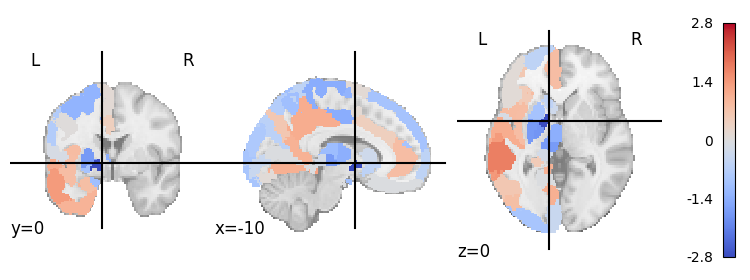

In [21]:
from sklearn.preprocessing import normalize 

atlas_data = atlas_img.get_fdata()
sim_atrophy = np.genfromtxt('/fs03/kg98/gchan/SIR_SCZ/SIR_simulator/SIR_matlab/results/RAB9A_TCAP_t-20000.csv', delimiter=',')
sim_atrophy = (sim_atrophy - np.mean(sim_atrophy)) / np.std(sim_atrophy)

# Adjust data
roi_mask = (atlas_data > 0) & (atlas_data < 66)
roi_indices = atlas_data[roi_mask].astype(int) - 1
sim_atrophy_data = np.zeros(atlas_data.shape)
sim_atrophy_data[roi_mask] = sim_atrophy[roi_indices].flatten()

# # set datatype in header (float32)
sim_atrophy_header = atlas_img.header.copy()
sim_atrophy_header['datatype'] = 16
sim_atrophy_affine = atlas_img.affine.copy()

sim_atrophy_img = nib.nifti1.Nifti1Image(sim_atrophy_data, sim_atrophy_affine, header=sim_atrophy_header)
nilearn.plotting.plot_stat_map(sim_atrophy_img, cmap="coolwarm", cut_coords = (-10, 0, 0))

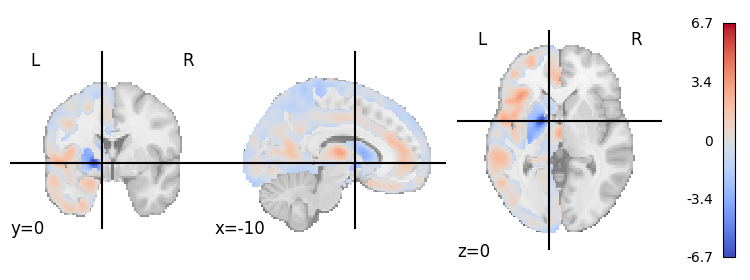

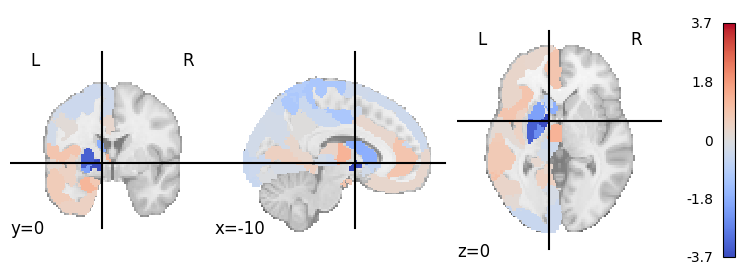

In [9]:
data_dir = ('/fs03/kg98/gchan/SIR_SCZ/SIR_utils/gen_null/spatial_null/voxelwise_lme/results/')
my_img = nib.load(data_dir + "lme_betas_2.nii.gz")
my_img_parc = nib.load(data_dir + "mean_lme_betas.nii.gz")

display = nilearn.plotting.plot_stat_map(my_img, cmap='coolwarm', cut_coords=[-10, 0, 0])
display = nilearn.plotting.plot_stat_map(my_img_parc, cmap='coolwarm', cut_coords=[-10, 0, 0])